# Alarm Logs in Packaging Industry (ALPI)

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Dataset source: https://ieee-dataport.org/open-access/alarm-logs-packaging-industry-alpi

In [136]:
data_path = "../data/alarms-log-data/raw/alarms.csv"
df = pd.read_csv(data_path)
df["timestamp"] = pd.to_datetime(df["timestamp"])

display(df.head())
print("Num. rows:", len(df))

,timestamp,alarm,serial
0,2019-02-21 19:57:57.532,139,4
1,2019-02-21 19:58:28.293,139,4
2,2019-02-21 19:58:32.853,139,4
3,2019-02-21 19:59:05.387,139,4
4,2019-02-21 20:02:05.832,139,4


Num. rows: 444834


In [137]:
machines = df["serial"].value_counts()
machines = pd.DataFrame(machines)
machines = machines.sort_values(by=["serial"])
# machines.head()

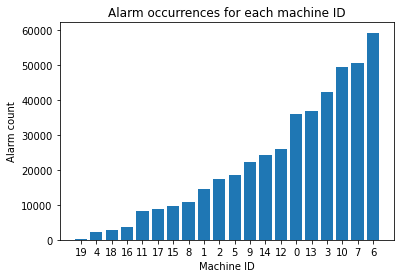

In [138]:
machine_ids = list(map(lambda x: str(x), machines.index))

plt.bar(machine_ids, machines.serial)
plt.title("Alarm occurrences for each machine ID")
plt.xlabel("Machine ID")
plt.ylabel("Alarm count")
plt.show()

In [139]:
alarms = df["alarm"].value_counts()
alarms = pd.DataFrame(alarms)
alarms = alarms.sort_values(by=["alarm"])
# alarms.head()

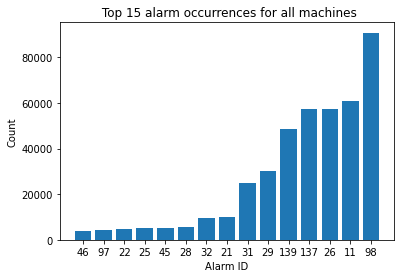

In [140]:
alarm_ids = list(map(lambda x: str(x), alarms.index))

top_n = 15
plt.bar(alarm_ids[-top_n:], alarms.alarm[-top_n:])
plt.title(f" Top {top_n} alarm occurrences for all machines")
plt.xlabel("Alarm ID")
plt.ylabel("Count")
plt.show()

In [60]:
# Machine 4
year_month = {
    "2019": {
        "year": 2019,
        "months": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    },
    "2020": {
        "year": 2020,
        "months": [1, 2, 3, 4, 5]
    }
}

In [122]:
def get_alarm_occurences(dataset, machine_id, month, year):
    result = dataset[
        (dataset["serial"] == machine_id) 
        & (dataset["timestamp"].dt.month == month) 
        & (dataset["timestamp"].dt.year == year)
    ]
    result = result.drop("serial", axis=1)
    result = result.set_index(["timestamp"])
    result = result.astype(str)
    return result

def transform_dataset(dataset):
    """Transform dataset using one hot encoder"""
    return pd.get_dummies(dataset, prefix=['alarm']).resample("15min").sum()


In [123]:
%%time

result_dict = {}
MACHINE_ID = 4 

for key, item in year_month.items():
    year = item["year"]
    for month in item["months"]:
        result = get_alarm_occurences(df, MACHINE_ID, month, year)
        result = transform_dataset(result)
        m = f"{month}" if month>=10 else f"0{month}" 
        result_dict[f"{year}_{m}"] = result
  

CPU times: user 1.12 s, sys: 0 ns, total: 1.12 s
Wall time: 1.11 s


In [125]:
machine4_transformed = []

for k, item in result_dict.items():
    if item.empty:
        print(f"{k} is empty")
    else:
        machine4_transformed.append(item)

machine4_transformed = pd.concat(machine4_transformed, axis=0)\
    .fillna(0)\
    .astype("float16")

machine4_transformed

2019_09 is empty
2019_10 is empty
2019_11 is empty
2019_12 is empty
2020_01 is empty
2020_02 is empty
2020_03 is empty
2020_04 is empty
2020_05 is empty


,alarm_139,alarm_26,alarm_27,alarm_29,alarm_51,alarm_98,alarm_1,alarm_111,alarm_12,alarm_131,...,alarm_129,alarm_46,alarm_17,alarm_25,alarm_34,alarm_55,alarm_0,alarm_37,alarm_48,alarm_32
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-02-21 19:45:00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-21 20:00:00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-21 20:15:00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-21 20:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-21 20:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-15 05:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-15 05:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-15 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


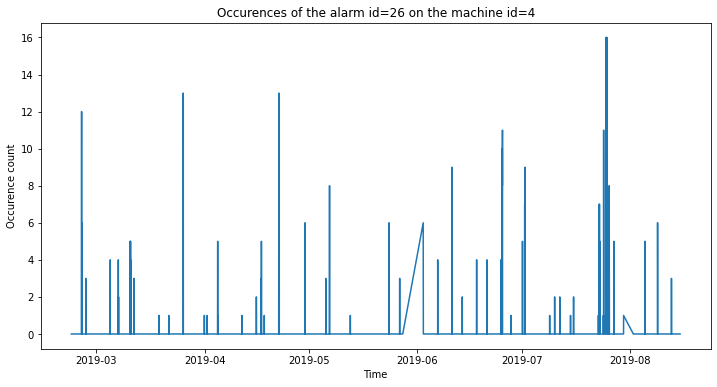

In [135]:
plt_1 = plt.figure(figsize=(12, 6))
plt.plot(machine4_transformed.index, machine4_transformed["alarm_26"])
plt.title("Occurences of the alarm id=26 on the machine id=4")
plt.xlabel("Time")
plt.ylabel("Occurence count")
plt.show()

In [131]:
data_path = "../data/alarms-log-data/processed/encoded/"
machine4_transformed.to_csv(data_path+"machine4_transformed.csv", index=True)